In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [18]:
# ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')

# tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [19]:
# ubah nama kolom
df = df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_score'})

# ubah data kategorikal menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

#tampilkan data yang sudah dipreprocessing
df.head(3)


,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [0]:
# emnghilangkan kolom customer_id dan gender
data = df.drop(['CustomerID', 'gender'], axis=1)

# membuat list yang berisi inersia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(data)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

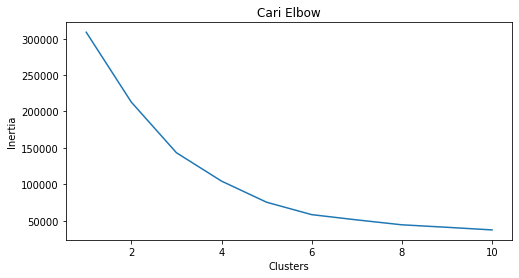

In [21]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

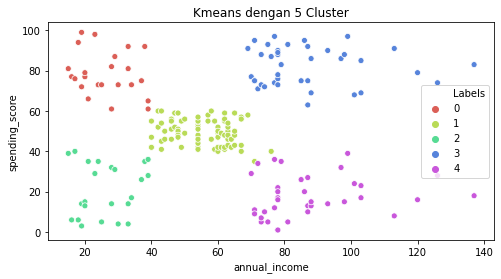

In [24]:
# membuat objek Kmeans
km5 = KMeans(n_clusters=5).fit(data)

# menambahkan kolom label pada dataset
data['Labels'] = km5.labels_

# membuat plot Kmeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(data['annual_income'], data['spending_score'], hue=data['Labels'], palette=sns.color_palette('hls', 5))
plt.title('Kmeans dengan 5 Cluster')
plt.show()